#### ***4. Create a line chart showing the trend of the average engagement rate over each month of the year. Separate the lines for tweets with media content and those without and this graph should work only between 3PM IST to 5 PM IST and 7 AM to 11AM apart from that time we should not show this graph in dashboard itself and the tweet engagement should be even number and tweet date should be odd number as well as tweet character count should be above 20 and need to remove tweet word which has letter 'C'.***

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Define the file path
file_path = "twitter.csv"

# --- Data Loading ---
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit() # Exit if file not found
except Exception as e:
    print(f"Error reading CSV file: {e}")
    exit() # Exit on other CSV reading errors

In [20]:
df.head(5)

,Unnamed: 0,Tweet,id,time,impressions,engagements,engagement rate,retweets,replies,likes,...,url clicks,hashtag clicks,detail expands,media views,media engagements,date,time_extracted,Day,Month,Year
0,0,id ligula suspendisse ornare consequat lectus ...,6.670000e+15,2020-06-30 21:09:00+00:00,365,4,0.010959,0,0,1,...,0,0,1,0,0,30-06-2020,21:09,30,6,2020
1,1,euismod scelerisque quam turpis adipiscing lor...,8.270000e+15,2020-06-30 17:14:00+00:00,184,2,0.010870,0,0,2,...,0,0,0,0,0,30-06-2020,17:14,30,6,2020
2,2,leo rhoncus sed vestibulum sit amet cursus id ...,2.810000e+14,2020-06-30 16:59:00+00:00,2644,46,0.017398,1,1,17,...,3,0,23,354,1,30-06-2020,16:59,30,6,2020
3,3,aenean lectus pellentesque eget nunc donec qui...,7.760000e+15,2020-06-30 13:55:00+00:00,301,3,0.009967,0,1,2,...,0,0,0,0,0,30-06-2020,13:55,30,6,2020
4,4,sed accumsan felis ut at dolor quis odio conse...,6.130000e+15,2020-06-30 12:13:00+00:00,528,0,0.000000,0,0,0,...,0,0,0,0,0,30-06-2020,12:13,30,6,2020


### Data Preprocessing

In [21]:
# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['date'])
df['Month'] = df['Date'].dt.month

C:\Users\mebub_9a7jdi8\AppData\Local\Temp\ipykernel_9924\2865370075.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['date'])


In [22]:
# Calculate character count
df['character_count'] = df['Tweet'].apply(lambda x: len(str(x)))

# Calculate engagement rate: (Likes + Retweets) / Impressions
# Handle cases where Impressions might be zero to avoid division by zero
df['engagement_rate'] = df.apply(
    lambda row: (row['likes'] + row['retweets']) / row['impressions'] if row['impressions'] > 0 else 0,
    axis=1
)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1166 non-null   int64         
 1   Tweet                1166 non-null   object        
 2   id                   1166 non-null   float64       
 3   time                 1166 non-null   object        
 4   impressions          1166 non-null   int64         
 5   engagements          1166 non-null   int64         
 6   engagement rate      1166 non-null   float64       
 7   retweets             1166 non-null   int64         
 8   replies              1166 non-null   int64         
 9   likes                1166 non-null   int64         
 10  user profile clicks  1166 non-null   int64         
 11  url clicks           1166 non-null   int64         
 12  hashtag clicks       1166 non-null   int64         
 13  detail expands       1166 non-nul

### Apply Filters

In [24]:
# 1. Tweet engagement rate (rounded to nearest integer) must be an even number.
# We multiply by 100 to get a more granular integer for checking even/odd
df = df[df['engagement_rate'].apply(lambda x: round(x * 100) % 2 == 0)]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 602 entries, 0 to 1165
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           602 non-null    int64         
 1   Tweet                602 non-null    object        
 2   id                   602 non-null    float64       
 3   time                 602 non-null    object        
 4   impressions          602 non-null    int64         
 5   engagements          602 non-null    int64         
 6   engagement rate      602 non-null    float64       
 7   retweets             602 non-null    int64         
 8   replies              602 non-null    int64         
 9   likes                602 non-null    int64         
 10  user profile clicks  602 non-null    int64         
 11  url clicks           602 non-null    int64         
 12  hashtag clicks       602 non-null    int64         
 13  detail expands       602 non-null    in

In [26]:
# 2. Tweet date (day of the month) must be an odd number.
df = df[df['Date'].dt.day % 2 != 0]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 34 to 1165
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           326 non-null    int64         
 1   Tweet                326 non-null    object        
 2   id                   326 non-null    float64       
 3   time                 326 non-null    object        
 4   impressions          326 non-null    int64         
 5   engagements          326 non-null    int64         
 6   engagement rate      326 non-null    float64       
 7   retweets             326 non-null    int64         
 8   replies              326 non-null    int64         
 9   likes                326 non-null    int64         
 10  user profile clicks  326 non-null    int64         
 11  url clicks           326 non-null    int64         
 12  hashtag clicks       326 non-null    int64         
 13  detail expands       326 non-null    i

In [28]:
# 3. Tweet character count must be above 20.
df = df[df['character_count'] > 20]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 34 to 1165
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           326 non-null    int64         
 1   Tweet                326 non-null    object        
 2   id                   326 non-null    float64       
 3   time                 326 non-null    object        
 4   impressions          326 non-null    int64         
 5   engagements          326 non-null    int64         
 6   engagement rate      326 non-null    float64       
 7   retweets             326 non-null    int64         
 8   replies              326 non-null    int64         
 9   likes                326 non-null    int64         
 10  user profile clicks  326 non-null    int64         
 11  url clicks           326 non-null    int64         
 12  hashtag clicks       326 non-null    int64         
 13  detail expands       326 non-null    i

In [30]:
# 4. Remove tweet words which have letter 'C'.
def remove_words_with_c(tweet):
    if isinstance(tweet, str):
        words = tweet.split()
        filtered_words = [word for word in words if 'c' not in word.lower()]
        return ' '.join(filtered_words)
    return tweet

df['Tweet'] = df['Tweet'].apply(remove_words_with_c)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 34 to 1165
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           326 non-null    int64         
 1   Tweet                326 non-null    object        
 2   id                   326 non-null    float64       
 3   time                 326 non-null    object        
 4   impressions          326 non-null    int64         
 5   engagements          326 non-null    int64         
 6   engagement rate      326 non-null    float64       
 7   retweets             326 non-null    int64         
 8   replies              326 non-null    int64         
 9   likes                326 non-null    int64         
 10  user profile clicks  326 non-null    int64         
 11  url clicks           326 non-null    int64         
 12  hashtag clicks       326 non-null    int64         
 13  detail expands       326 non-null    i

In [32]:
# Create 'has_media' column
# Assuming 'Media' column indicates presence of media (e.g., non-null values)
df['has_media'] = df['media views'] > 0

In [33]:
# --- Data Aggregation ---

# Group by month and media presence, then calculate average engagement rate
grouped_data = df.groupby(['Month', 'has_media'])['engagement_rate'].mean().unstack()

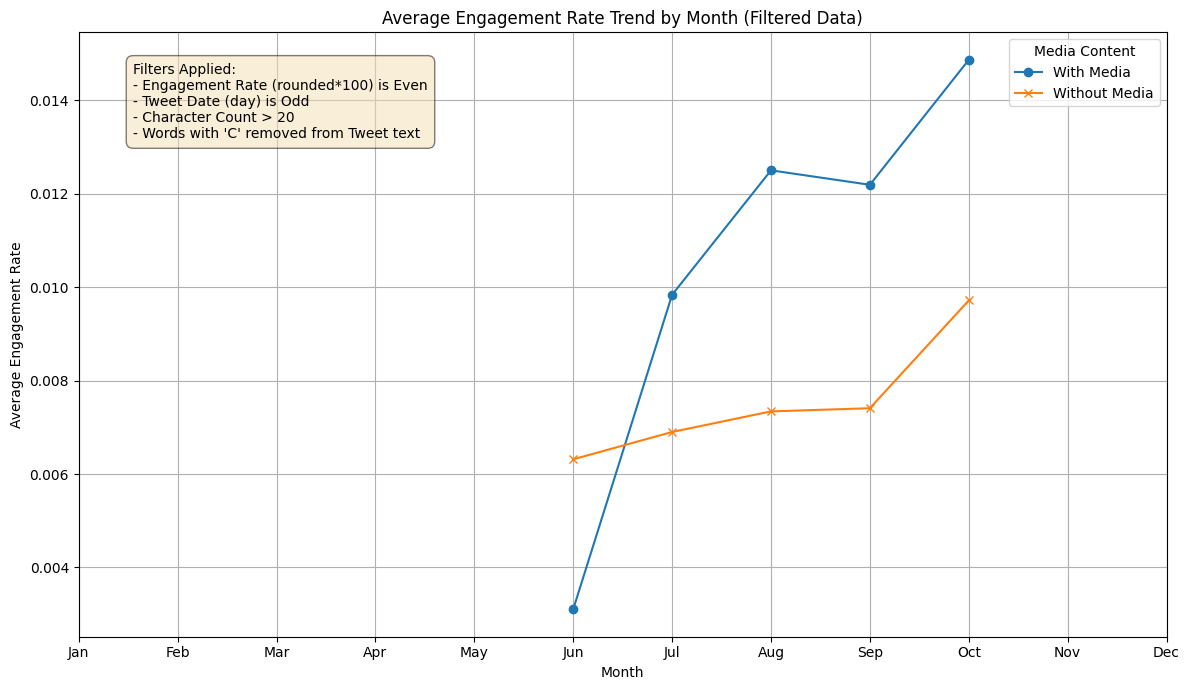

In [36]:
# --- Plotting ---

plt.figure(figsize=(12, 7))
if True in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[True], label='With Media', marker='o')
if False in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[False], label='Without Media', marker='x')

plt.title('Average Engagement Rate Trend by Month (Filtered Data)')
plt.xlabel('Month')
plt.ylabel('Average Engagement Rate')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Media Content')
plt.grid(True)
plt.tight_layout()

# Add description of filters to the plot
filters_description = (
    "Filters Applied:\n"
    "- Engagement Rate (rounded*100) is Even\n"
    "- Tweet Date (day) is Odd\n"
    "- Character Count > 20\n"
    "- Words with 'C' removed from Tweet text"
)
# plt.figtext(0.02, 0.02, filters_description, ha="left", fontsize=9, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
# plt.figtext(0.5, -0.1, filters_description, ha="center", fontsize=10, wrap=True)
plt.text(0.05, 0.95, filters_description, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.savefig('engagement_rate_by_month_filtered.png')
plt.show()